# Exploratory Data Analysis

[AI4I 2020 Predictive Maintenance Data Set](http://archive.ics.uci.edu/ml/datasets/AI4I+2020+Predictive+Maintenance+Dataset) from the UCI Machine Learning Repository.


Data Source:

Stephan Matzka, School of Engineering - Technology and Life, Hochschule für Technik und Wirtschaft Berlin, 12459 Berlin, Germany.

## Gather

In [1]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv

--2021-07-14 19:50:10--  http://archive.ics.uci.edu/ml/machine-learning-databases/00601/ai4i2020.csv
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 522048 (510K) [application/x-httpd-php]
Saving to: ‘ai4i2020.csv’

ai4i2020.csv        100%[===================>] 509.81K  1.35MB/s    in 0.4s    

2021-07-14 19:50:11 (1.35 MB/s) - ‘ai4i2020.csv’ saved [522048/522048]



In [2]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## Assess

The dataset consist of 1,000 products identified by a unique ID. There are six feature columns:

- Type -- categorical with three values 'M', 'L', 'H'
- Air temperature [K] -- continous reading of air temperature in Kelvin degrees.
- Process temperature [K] -- continous reading of air temperature in Kelvin degrees.
- Rotational speed [rpm] -- continous reading of Rotation Per Minute 
- Torque [Nm] -- continous reading of Torque in Newton meter
- Tool wear [min] -- containues reading of minutes of tool wear

In [3]:
data_df = pd.read_csv('ai4i2020.csv')
data_df.head()

,UDI,Product ID,Type,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
0,1,M14860,M,298.1,308.6,1551,42.8,0,0,0,0,0,0,0
1,2,L47181,L,298.2,308.7,1408,46.3,3,0,0,0,0,0,0
2,3,L47182,L,298.1,308.5,1498,49.4,5,0,0,0,0,0,0
3,4,L47183,L,298.2,308.6,1433,39.5,7,0,0,0,0,0,0
4,5,L47184,L,298.2,308.7,1408,40.0,9,0,0,0,0,0,0


In [4]:
data_df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Tool wear [min]            0
Machine failure            0
TWF                        0
HDF                        0
PWF                        0
OSF                        0
RNF                        0
dtype: int64

In [5]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [6]:
data_df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Tool wear [min],Machine failure,TWF,HDF,PWF,OSF,RNF
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000
mean,5000.50000,300.004930,310.005560,1538.776100,39.986910,107.951000,0.033900,0.004600,0.011500,0.009500,0.009800,0.00190
std,2886.89568,2.000259,1.483734,179.284096,9.968934,63.654147,0.180981,0.067671,0.106625,0.097009,0.098514,0.04355
min,1.00000,295.300000,305.700000,1168.000000,3.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,2500.75000,298.300000,308.800000,1423.000000,33.200000,53.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
50%,5000.50000,300.100000,310.100000,1503.000000,40.100000,108.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
75%,7500.25000,301.500000,311.100000,1612.000000,46.800000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
max,10000.00000,304.500000,313.800000,2886.000000,76.600000,253.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000


In [7]:
data_df['Type'].unique()

array(['M', 'L', 'H'], dtype=object)

In [8]:
len(data_df['Product ID'].unique())

10000

## Clean

The dataset does not contain any null values and there is no need to perform any cleanup or imputation for further analysis of the data.

## Exploratory Data Analysis

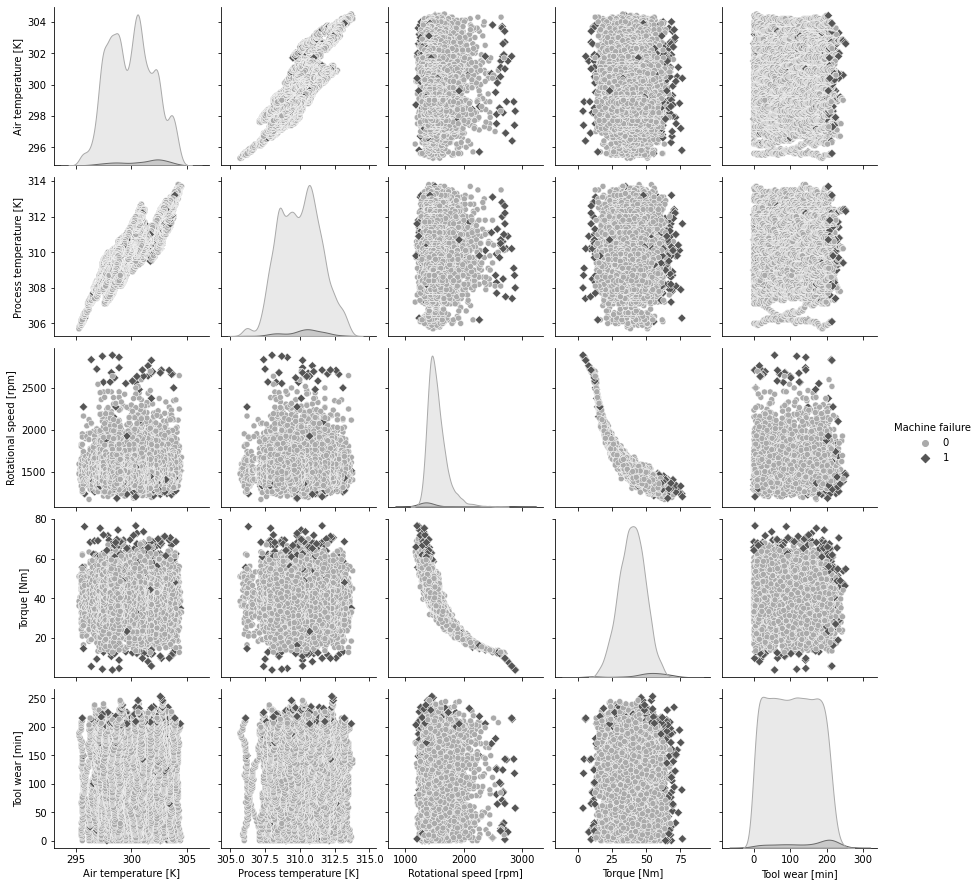

In [10]:
data_columns = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']
sns.pairplot(data_df,
             hue='Machine failure',
             palette='binary',
             markers=['o', 'D'],
             vars=data_columns,
             diag_kind='kde');

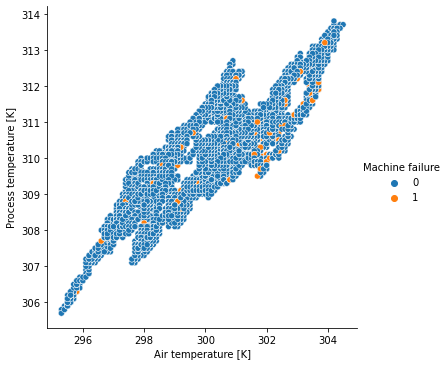

In [12]:
_ = sns.relplot(x="Air temperature [K]", y="Process temperature [K]", hue="Machine failure", data=data_df)

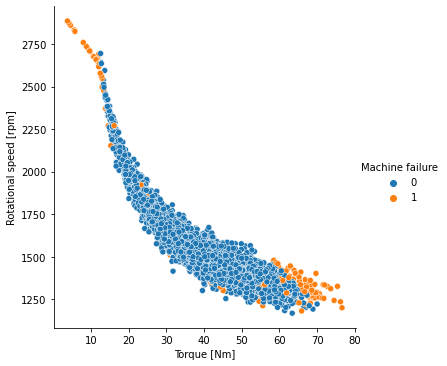

In [13]:
_ = sns.relplot(x="Torque [Nm]", y="Rotational speed [rpm]", hue="Machine failure", data=data_df)

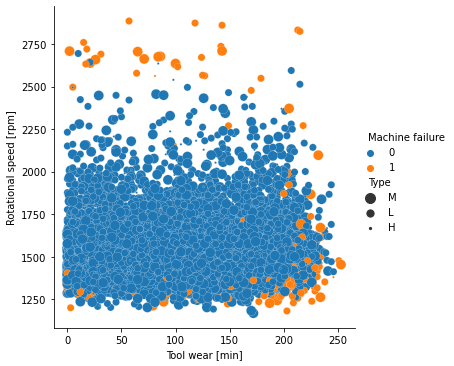

In [15]:
_ = sns.relplot(x="Tool wear [min]", 
                y="Rotational speed [rpm]", 
                hue="Machine failure", 
                size="Type", 
                sizes=(5, 100), 
                data=data_df)

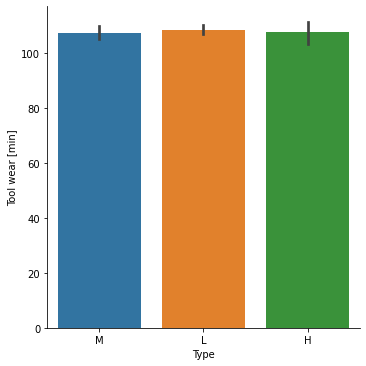

In [16]:
_ = sns.catplot(x="Type", y="Tool wear [min]", kind="bar", data=data_df)

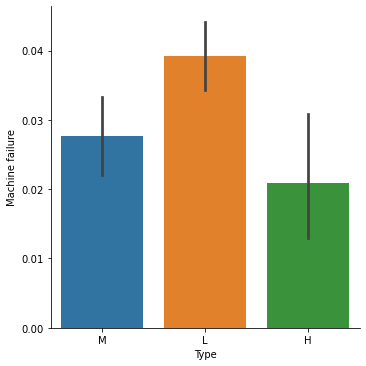

In [17]:
_ = sns.catplot(x="Type", y="Machine failure", kind="bar", data=data_df)

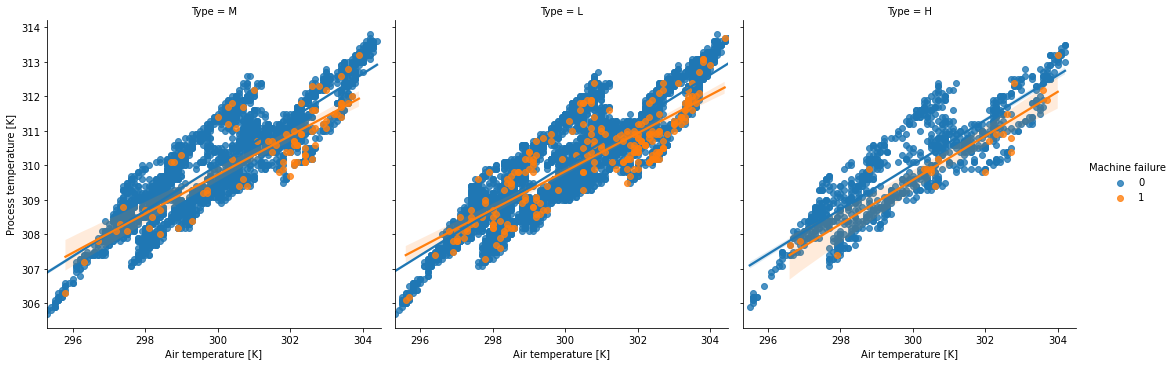

In [18]:
_ = sns.lmplot(x="Air temperature [K]", 
               y="Process temperature [K]", 
               hue="Machine failure", 
               col="Type", 
               data=data_df)

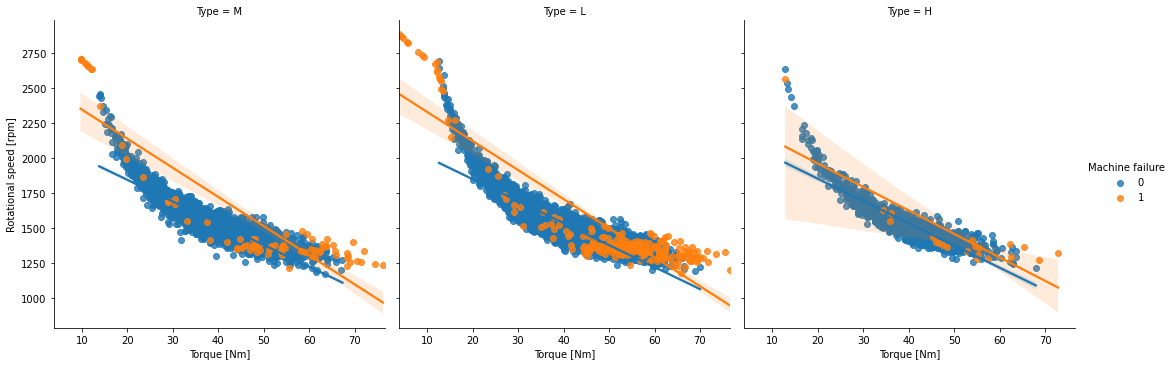

In [19]:
_ = sns.lmplot(x="Torque [Nm]", 
               y="Rotational speed [rpm]", 
               hue="Machine failure", 
               col="Type", 
               data=data_df)

In [22]:
data_df['Machine failure'].value_counts(normalize=True)

0    0.9661
1    0.0339
Name: Machine failure, dtype: float64

In [23]:
data_df[['TWF', 'HDF', 'PWF', 'OSF','RNF']].sum().to_frame()

,0
TWF,46
HDF,115
PWF,95
OSF,98
RNF,19


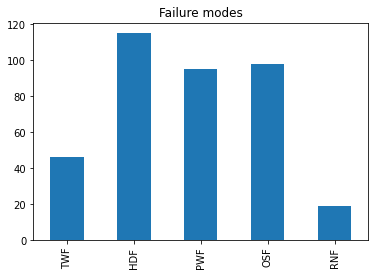

In [26]:
df = data_df[['TWF', 'HDF', 'PWF', 'OSF','RNF']].sum().to_frame()
_ = df.plot(kind='bar', legend=None, title="Failure modes")
plt.savefig('failure_modes.png')

In [27]:
data_df[['Rotational speed [rpm]','Torque [Nm]']].corr()

,Rotational speed [rpm],Torque [Nm]
Rotational speed [rpm],1.000000,-0.875027
Torque [Nm],-0.875027,1.000000


In [28]:
data_df[['Air temperature [K]', 'Process temperature [K]']].corr()

,Air temperature [K],Process temperature [K]
Air temperature [K],1.000000,0.876107
Process temperature [K],0.876107,1.000000


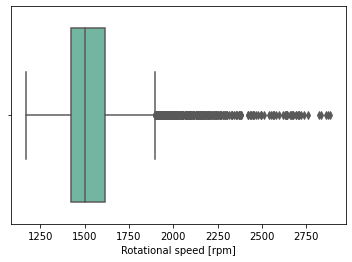

In [29]:
ax = sns.boxplot(x='Rotational speed [rpm]', data=data_df, palette="Set2")

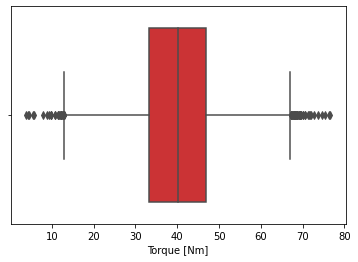

In [30]:
ax = sns.boxplot(x='Torque [Nm]', data=data_df, palette="Set1")

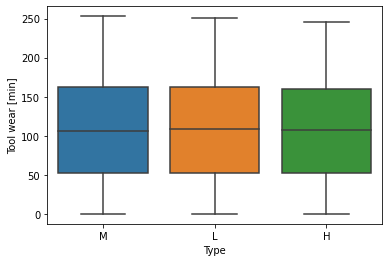

In [31]:
ax = sns.boxplot(y='Tool wear [min]', x='Type', data=data_df)

Text(0.5, 1.0, 'Temperature ranges')

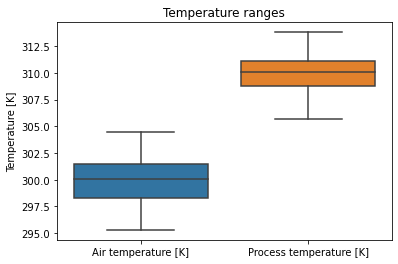

In [32]:
ax = sns.boxplot(y='value', 
                 x='variable', 
                 data=data_df[['Air temperature [K]', 'Process temperature [K]']].melt())
ax.set_ylabel('Temperature [K]')
ax.set_xlabel('')
ax.set_title('Temperature ranges')

## Prepare data file

Create data file for training and evaluation

In [33]:
data_columns = ['Machine failure',
                'Air temperature [K]', 
                'Process temperature [K]', 
                'Rotational speed [rpm]', 
                'Torque [Nm]', 
                'Tool wear [min]']

rename_columns = {'Machine failure': 'y',
                  'Air temperature [K]': 'air_temperature',
                  'Process temperature [K]': 'process_temperature',
                  'Rotational speed [rpm]': 'rotational_speed',
                  'Torque [Nm]': 'torque',
                  'Tool wear [min]': 'tool_wear',
                  'H': 'high',
                  'L': 'low',
                  'M': 'medium'}


 
feature_df = pd.concat([data_df[data_columns], pd.get_dummies(data_df['Type'])], axis=1)
feature_df.rename(columns=rename_columns, inplace=True)
feature_df.tail()

,y,air_temperature,process_temperature,rotational_speed,torque,tool_wear,high,low,medium
9995,0,298.8,308.4,1604,29.5,14,0,0,1
9996,0,298.9,308.4,1632,31.8,17,1,0,0
9997,0,299.0,308.6,1645,33.4,22,0,0,1
9998,0,299.0,308.7,1408,48.5,25,1,0,0
9999,0,299.0,308.7,1500,40.2,30,0,0,1


In [34]:
!pip install -U imbalanced-learn

You should consider upgrading via the '/home/ec2-user/anaconda3/envs/amazonei_mxnet_p36/bin/python -m pip install --upgrade pip' command.


In [35]:
from imblearn.over_sampling import SMOTE

In [36]:
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(feature_df.iloc[:,1:], feature_df['y'])
feature_df = pd.concat([y_res, X_res], axis=1)

In [41]:
feature_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19322 entries, 0 to 19321
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   y                    19322 non-null  int64  
 1   air_temperature      19322 non-null  float64
 2   process_temperature  19322 non-null  float64
 3   rotational_speed     19322 non-null  int64  
 4   torque               19322 non-null  float64
 5   tool_wear            19322 non-null  int64  
 6   high                 19322 non-null  uint8  
 7   low                  19322 non-null  uint8  
 8   medium               19322 non-null  uint8  
dtypes: float64(3), int64(3), uint8(3)
memory usage: 962.5 KB


## Upload training data
Now that we've created our dataset, we'll need to upload it to S3, so that Amazon SageMaker training can use it.

In [38]:
import boto3
import sagemaker
import s3fs

role = sagemaker.get_execution_role()
sess = sagemaker.Session()

bucket = sess.default_bucket()
prefix = "marcus-machine-failure"

In [39]:
import s3fs

s3 = s3fs.S3FileSystem(anon=False)

key = "ai4i2020_smote.csv"
with s3.open(f'{bucket}/{prefix}/{key}','w') as f:
    feature_df.to_csv(f)